In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/MBA 2.csv')

In [ ]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


Checking for Shape,info.descriptive Stats,Missing Values

In [ ]:
df.shape

(6194, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [ ]:
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


In [ ]:
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,5194


In [ ]:
df['race']=df['race'].fillna(df['race'].mode()[0])

In [ ]:
df['admission']=df['admission'].fillna(df['admission'].mode()[0])

In [ ]:
df.nunique()

,0
application_id,6194
gender,2
international,2
gpa,101
major,3
race,5
gmat,22
work_exp,9
work_industry,14
admission,2


In [ ]:
df=df.drop(['application_id'],axis=1)

In [ ]:
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [ ]:
df.isnull().sum()

,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


Checking for Outliers

<Axes: >

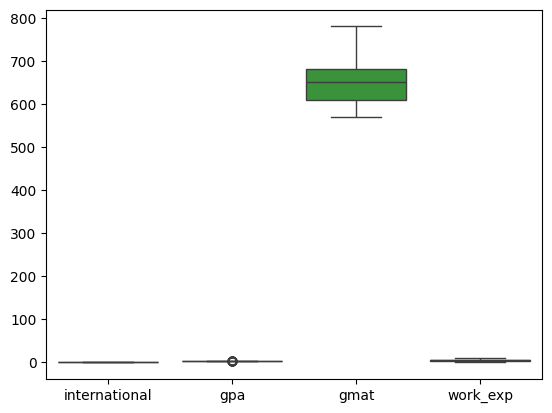

In [ ]:
sns.boxplot(df)

Seperating X and Y

In [ ]:
X=df.drop(['admission'],axis=1)
y=df['admission']

Seperating Catagorical and Numerical Values in X

In [ ]:
cat_fe=[feature for feature in X.columns if X[feature].dtypes=='O']

In [ ]:
num_fe=[feature for feature in X.columns if X[feature].dtypes!='O']

Encoding the Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder=OneHotEncoder()

In [ ]:
encoder.fit(df[cat_fe])

OneHotEncoder()

In [ ]:
enc_cat_fe=encoder.transform(df[cat_fe]).toarray()
enc_cat_fe=pd.DataFrame(enc_cat_fe,columns=encoder.get_feature_names_out())

In [ ]:
enc_cat_fe.head(1)

,gender_Female,gender_Male,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,race_Hispanic,race_Other,race_White,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_clean=pd.concat([enc_cat_fe,df[num_fe]],axis=1)

In [ ]:
df_clean.isnull().sum()

,0
gender_Female,0
gender_Male,0
major_Business,0
major_Humanities,0
major_STEM,0
race_Asian,0
race_Black,0
race_Hispanic,0
race_Other,0
race_White,0


In [ ]:
X=df_clean

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()

In [ ]:
encoder.fit(y)

LabelEncoder()

In [ ]:
y_trans=encoder.transform(y)

In [ ]:
y=y_trans

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
classifier=DecisionTreeClassifier(max_depth=8)

In [ ]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn import tree

[Text(0.4438405797101449, 0.9444444444444444, 'x[26] <= 625.0\ngini = 0.033\nsamples = 4955\nvalue = [4873, 82]'),
 Text(0.26358695652173914, 0.8333333333333334, 'x[22] <= 0.5\ngini = 0.009\nsamples = 1631\nvalue = [1624, 7]'),
 Text(0.353713768115942, 0.8888888888888888, 'True  '),
 Text(0.19384057971014493, 0.7222222222222222, 'x[0] <= 0.5\ngini = 0.007\nsamples = 1623\nvalue = [1617, 6]'),
 Text(0.1793478260869565, 0.6111111111111112, 'gini = 0.0\nsamples = 1013\nvalue = [1013, 0]'),
 Text(0.20833333333333334, 0.6111111111111112, 'x[10] <= 0.5\ngini = 0.019\nsamples = 610\nvalue = [604.0, 6.0]'),
 Text(0.14130434782608695, 0.5, 'x[26] <= 615.0\ngini = 0.017\nsamples = 597\nvalue = [592, 5]'),
 Text(0.07246376811594203, 0.3888888888888889, 'x[27] <= 4.5\ngini = 0.008\nsamples = 478\nvalue = [476.0, 2.0]'),
 Text(0.057971014492753624, 0.2777777777777778, 'x[7] <= 0.5\ngini = 0.03\nsamples = 130\nvalue = [128, 2]'),
 Text(0.028985507246376812, 0.16666666666666666, 'x[24] <= 0.5\ngini =

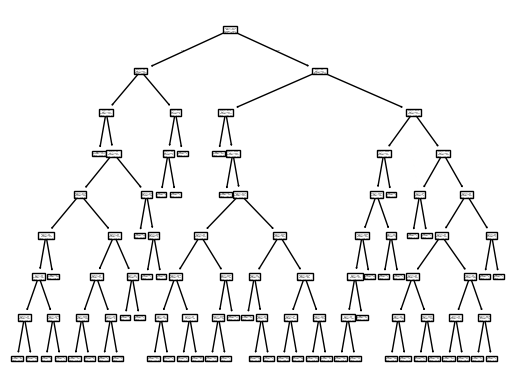

In [ ]:
tree.plot_tree(classifier)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
#

0.9846650524616626
[[1220    1]
 [  18    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1221
           1       0.00      0.00      0.00        18

    accuracy                           0.98      1239
   macro avg       0.49      0.50      0.50      1239
weighted avg       0.97      0.98      0.98      1239



In [ ]:
import pickle as pkl

In [ ]:
pkl.dump(classifier,open('decision_tree.pkl','wb'))
pkl.dump(encoder,open('encoder_dt.pkl','wb'))